In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Download Data

In [6]:
!gdown 1euU1hlZ_GeGx58cg9-MYYJND-xKSKkSc

Downloading...
From: https://drive.google.com/uc?id=1euU1hlZ_GeGx58cg9-MYYJND-xKSKkSc
To: C:\Users\LALIT\Intro to AI & ML\Project Proposal\car_prices.csv

  0%|          | 0.00/88.0M [00:00<?, ?B/s]
  1%|          | 524k/88.0M [00:00<00:36, 2.40MB/s]
  2%|1         | 1.57M/88.0M [00:00<00:21, 3.97MB/s]
  2%|2         | 2.10M/88.0M [00:00<00:20, 4.22MB/s]
  4%|3         | 3.15M/88.0M [00:00<00:17, 4.81MB/s]
  5%|4         | 4.19M/88.0M [00:00<00:16, 4.95MB/s]
  6%|5         | 5.24M/88.0M [00:01<00:16, 5.17MB/s]
  7%|7         | 6.29M/88.0M [00:01<00:14, 5.46MB/s]
  8%|8         | 7.34M/88.0M [00:01<00:14, 5.50MB/s]
 10%|9         | 8.39M/88.0M [00:01<00:14, 5.68MB/s]
 11%|#         | 9.44M/88.0M [00:01<00:13, 5.65MB/s]
 12%|#1        | 10.5M/88.0M [00:02<00:13, 5.79MB/s]
 13%|#3        | 11.5M/88.0M [00:02<00:11, 6.39MB/s]
 15%|#4        | 13.1M/88.0M [00:02<00:09, 7.95MB/s]
 17%|#7        | 15.2M/88.0M [00:02<00:06, 10.6MB/s]
 20%|#9        | 17.3M/88.0M [00:02<00:05, 12.3MB/s]
 22%|##

In [7]:
os.listdir()[2]

'car_prices.csv'

# Load the data file
Using pandas, load the datafile to a dataframe

In [8]:
data = pd.read_csv('car_prices.csv')

In [9]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [10]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [11]:
car_data_trimmed = data[data['sellingprice'] < 60000]

In [12]:
car_data_trimmed = car_data_trimmed[car_data_trimmed['sellingprice'] > 1000]

In [13]:
car_data_trimmed.describe()

,year,condition,odometer,mmr,sellingprice
count,539235.00000,528846.000000,539179.000000,539209.000000,539235.000000
mean,2010.33356,31.224498,65345.790211,13988.202626,13847.248966
std,3.60645,13.066479,49865.297600,8844.090443,8893.711127
min,1982.00000,1.000000,1.000000,25.000000,1005.000000
25%,2008.00000,25.000000,27957.000000,7775.000000,7500.000000
50%,2012.00000,35.000000,50446.000000,12500.000000,12400.000000
75%,2013.00000,42.000000,94856.500000,18500.000000,18400.000000
max,2015.00000,49.000000,999999.000000,110000.000000,59900.000000


# 1. Pre-Process Data

## 1.1 Check to see if data has gaps Nulls, N/A, None.

In [14]:
null_values = car_data_trimmed.isna()

In [15]:
null_per_column = null_values.sum()

In [16]:
null_per_row = null_values.sum(axis=1)

In [17]:
null_per_column

year                0
make             9025
model            9042
trim             9344
body            11476
transmission    62807
vin                 4
state               0
condition       10389
odometer           56
color             678
interior          678
seller              0
mmr                26
sellingprice        0
saledate            0
dtype: int64

In [18]:
car_data_removed_null = car_data_trimmed.dropna()

In [19]:
null_values_cleaned = car_data_removed_null.isna()
null_per_column_cleaned = null_values_cleaned.sum()
null_per_column_cleaned

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## 1.2 Anomalies (outliers) in the features

In [20]:
Q_1 = car_data_removed_null.quantile(0.25)
Q_3 = car_data_removed_null.quantile(0.75)
IQR = Q_3 - Q_1
threshold = 1.5
outliers = (car_data_removed_null < (Q_1 - threshold * IQR)) | (car_data_removed_null > (Q_3 + threshold * IQR))

C:\Users\LALIT\AppData\Local\Temp\ipykernel_9904\1250133866.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (car_data_removed_null < (Q_1 - threshold * IQR)) | (car_data_removed_null > (Q_3 + threshold * IQR))


In [21]:
no_outliers = outliers.sum().sum()

In [22]:
print('Total number of outliers in the dataframe are: ', no_outliers)

Total number of outliers in the dataframe are:  40142


In [23]:
car_data_removed_outlier = car_data_removed_null[~outliers.any(axis=1)] # Removed outliers in this block of code

In [24]:
car_data_removed_outlier.describe()

,year,condition,odometer,mmr,sellingprice
count,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000
mean,2010.590579,31.384935,61829.785772,13391.876153,13248.714087
std,3.255918,12.850038,42737.806521,7144.393680,7235.115067
min,2001.000000,1.000000,1.000000,225.000000,1025.000000
25%,2008.000000,25.000000,28284.000000,8200.000000,8000.000000
50%,2012.000000,35.000000,49615.000000,12450.000000,12400.000000
75%,2013.000000,42.000000,90788.000000,17850.000000,17800.000000
max,2015.000000,49.000000,190432.000000,34100.000000,34200.000000


## 1.3 Analyze the labels

### 1.3.1 Provide the histogram of the regression label

<AxesSubplot:>

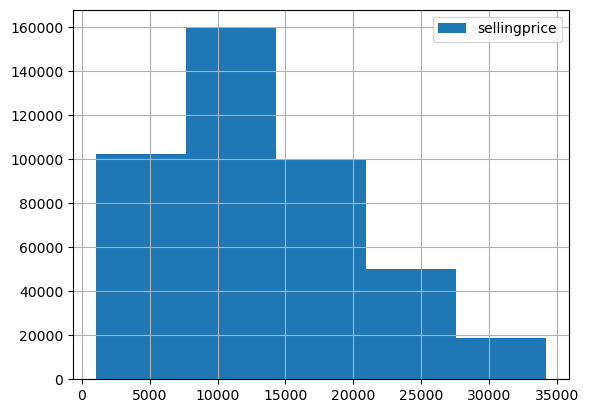

In [25]:
Regression_Label = car_data_removed_outlier['sellingprice']
#len(Regression_Label)
Regression_Label.hist(bins=5, legend = True)

### 1.3.2 Provide the count of the numbers of record of each class

In [26]:
class_bins = [1000 ,5000, 10000, 15000, 20000, 30000, 40000]
class_names = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-30k', '30k-40k']

In [27]:
num_records = []
for i in range(len(class_bins) - 1):
    num_records_value = ((car_data_removed_outlier['sellingprice'] >= class_bins[i]) & (car_data_removed_outlier['sellingprice'] < class_bins[i+1])).sum()
    num_records.append(num_records_value)
num_records

[58054, 92756, 124723, 75829, 70224, 9269]

In [28]:
print('Following are the counts for each label -->')
for i in range(len(class_names)):
    print(f"{i+1}. Number of records in '{class_names[i]}' are {num_records[i]}")

Following are the counts for each label -->
1. Number of records in '<5k' are 58054
2. Number of records in '5k-10k' are 92756
3. Number of records in '10k-15k' are 124723
4. Number of records in '15k-20k' are 75829
5. Number of records in '20k-30k' are 70224
6. Number of records in '30k-40k' are 9269


## 1.4 Encode columns that contains text

In [29]:
label_encoder = LabelEncoder()

In [30]:
for col in car_data_removed_outlier.columns:
    if car_data_removed_outlier[col].dtype == 'object':  # Check if column contains text
        #print(col)
        car_data_removed_outlier[col] = label_encoder.fit_transform(car_data_removed_outlier[col])

C:\Users\LALIT\AppData\Local\Temp\ipykernel_9904\3678365759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_removed_outlier[col] = label_encoder.fit_transform(car_data_removed_outlier[col])


In [31]:
car_data_removed_outlier

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,18,533,683,32,0,315880,2,5.0,16639.0,17,1,5545,20500.0,21500.0,1611
1,2015,18,533,683,32,0,315874,2,5.0,9393.0,17,0,5545,20800.0,21500.0,1611
2,2014,2,6,223,33,0,395158,2,45.0,1331.0,7,1,3816,31900.0,30000.0,1040
3,2015,41,480,1025,33,0,422274,2,41.0,14282.0,17,1,10724,27500.0,27750.0,1129
5,2015,28,46,89,33,0,147618,2,1.0,5554.0,7,1,3533,15350.0,10900.0,1674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,2,15,267,33,0,397030,4,39.0,66403.0,17,3,5802,20300.0,22800.0,1978
558833,2012,33,4,781,10,0,225524,32,5.0,54393.0,17,1,4986,30200.0,30800.0,3034
558834,2012,2,608,1257,32,0,311171,2,48.0,50561.0,1,1,3816,29800.0,34000.0,3034
558835,2015,28,46,89,71,0,147103,5,38.0,16658.0,17,1,3533,15100.0,11100.0,1161


## 1.5 Normalize numerical columns

In [32]:
numerical_columns = ['odometer', 'mmr']
normalizer = MinMaxScaler()
car_data_removed_outlier[numerical_columns] = normalizer.fit_transform(car_data_removed_outlier[numerical_columns])

C:\Users\LALIT\AppData\Local\Temp\ipykernel_9904\1101813988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_removed_outlier[numerical_columns] = normalizer.fit_transform(car_data_removed_outlier[numerical_columns])


# 2. Data Visualization

In [33]:
car_data_removed_outlier.describe()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000,430855.000000
mean,2010.590579,16.253050,274.793687,654.632001,36.377002,0.032807,212437.951926,13.744190,31.384935,0.324678,9.455831,3.799083,5628.035936,0.388690,13248.714087,1826.044402
std,3.255918,11.711785,176.776497,320.078619,16.494339,0.178131,122654.141616,10.422514,12.850038,0.224427,6.648410,4.034771,3201.517789,0.210905,7235.115067,894.074734
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1025.000000,0.000000
25%,2008.000000,7.000000,134.000000,357.000000,32.000000,0.000000,106198.500000,4.000000,25.000000,0.148521,2.000000,1.000000,3274.000000,0.235424,8000.000000,1084.000000
50%,2012.000000,12.000000,230.000000,678.000000,33.000000,0.000000,212409.000000,12.000000,35.000000,0.260535,7.000000,1.000000,5321.000000,0.360886,12400.000000,1836.000000
75%,2013.000000,27.000000,404.000000,901.000000,33.000000,0.000000,318629.500000,25.000000,42.000000,0.476745,15.000000,6.000000,8475.000000,0.520295,17800.000000,2560.000000
max,2015.000000,42.000000,649.000000,1261.000000,79.000000,1.000000,424773.000000,33.000000,49.000000,1.000000,19.000000,16.000000,11084.000000,1.000000,34200.000000,3456.000000


In [34]:
car_data_removed_outlier['priceBins'] = pd.cut(car_data_removed_outlier['sellingprice'], class_bins, labels=class_names)

C:\Users\LALIT\AppData\Local\Temp\ipykernel_9904\518944814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_removed_outlier['priceBins'] = pd.cut(car_data_removed_outlier['sellingprice'], class_bins, labels=class_names)


In [35]:
car_data_removed_outlier['priceBins']

0         20k-30k
1         20k-30k
2         20k-30k
3         20k-30k
5         10k-15k
           ...   
558831    20k-30k
558833    30k-40k
558834    30k-40k
558835    10k-15k
558836    20k-30k
Name: priceBins, Length: 430855, dtype: category
Categories (6, object): ['<5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-30k' < '30k-40k']

In [36]:
encoded_values = label_encoder.fit_transform(car_data_removed_outlier['priceBins'])
label_correspondence = {label: original_label for original_label, label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
label_correspondence

{0: '10k-15k', 1: '15k-20k', 2: '20k-30k', 3: '30k-40k', 4: '5k-10k', 5: '<5k'}

## 2.1 Histogram of Selling Price

This histogram is plotted to check the number of entries in each label or category

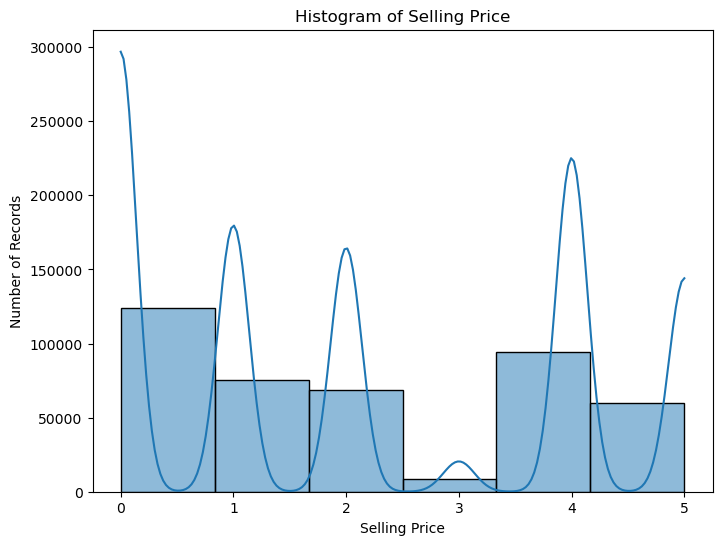

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(encoded_values, bins=6, kde=True)
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Number of Records')
plt.show()

## 2.2 Countplot of Selling Price by State

This countplot is plotted to check the number of cars belonging to each category (Price range) in each of the given 33 states in the dataset

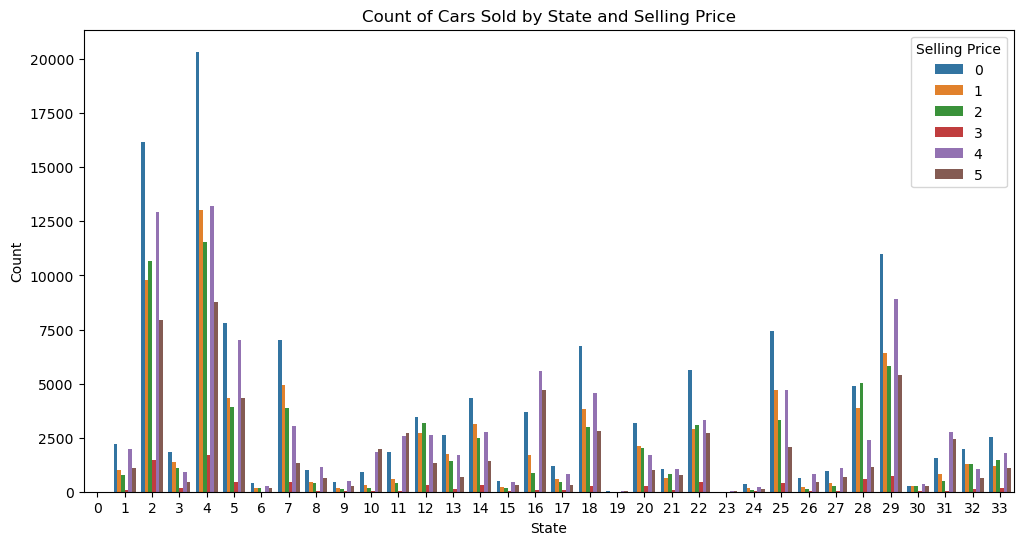

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x=car_data_removed_outlier['state'], hue=encoded_values)
plt.title('Count of Cars Sold by State and Selling Price')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Selling Price')
plt.show()

## 2.3 Boxplot of Selling Price by Make

This boxplot is plotted to check how the distribution of each mentioned category of selling price varies with the Make of the car.

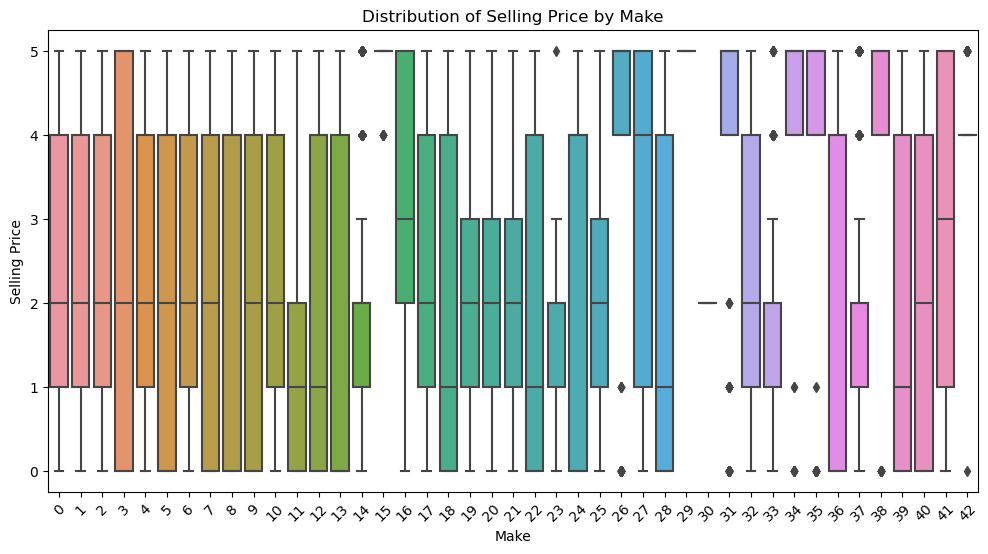

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=car_data_removed_outlier['make'], y=encoded_values)
plt.title('Distribution of Selling Price by Make')
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

## 2.4 Scatter Plot of Odometer vs Selling Price

This scatter plot indicates the distribution of odometer reading for each of the selling price category.

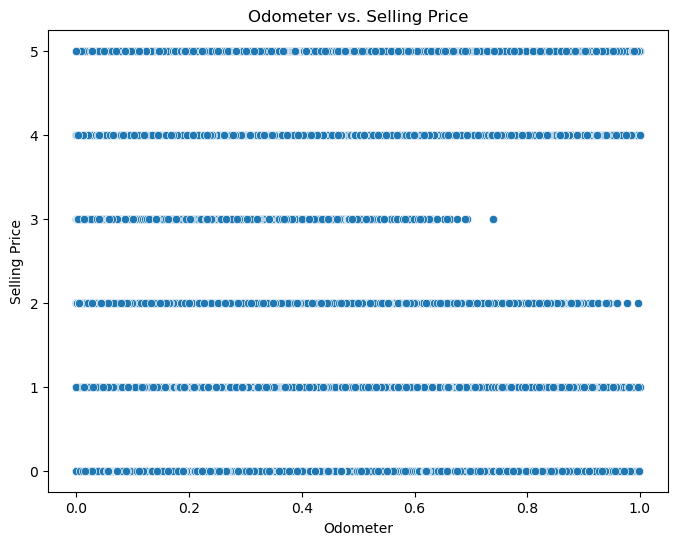

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=car_data_removed_outlier['odometer'], y=encoded_values)
plt.title('Odometer vs. Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

# 3. Problem Statement

## 3.1 Regression

Feature Columns: year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, mmr

Label Column: Selling Price

The features like year, make, model, odometer, etc. all contribute to the selling price of the car. VIN number of vehicle and sellingDate don't contribute to the selling price, hence those columns will be removed in the feature extraction stage.

Evaluation Metrics: mean squared error, root mean squared error, and R-square will be calculate to evalute the prediction quality.

## 3.2 Classification

Ranges for the classification label: The ranges are in dollars. There are six ranges. 1. Less than $ 5000, 2. Between $ 5000 to $ 10000, 3. Between $ 10000 to $ 15000, 4. Between $ 15000 to $ 20000, 5. Between $ 20000 to $ 30000, 6. Between $ 30000 to $ 40000.

Performance Comparison: Performance of the model will be evaluated by calculating confusion matrix, precision, recall, and f1-score

# 4. Features Selection/Extraction

## 4.1 Feature Selection

In [41]:
columns_to_drop = ['vin', 'saledate']
car_data_removed_outlier = car_data_removed_outlier.drop(columns = columns_to_drop)

## 4.2 Feature Extraction

In [42]:
regression_label_data = car_data_removed_outlier['sellingprice']
classification_label_data = encoded_values

In [43]:
columns_to_drop = ['sellingprice', 'priceBins']
car_data_for_pca = car_data_removed_outlier.drop(columns = columns_to_drop)

In [44]:
car_data_for_pca.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr
0,2015,18,533,683,32,0,2,5.0,0.087370,17,1,5545,0.598524
1,2015,18,533,683,32,0,2,5.0,0.049320,17,0,5545,0.607380
2,2014,2,6,223,33,0,2,45.0,0.006984,7,1,3816,0.935055
3,2015,41,480,1025,33,0,2,41.0,0.074993,17,1,10724,0.805166
5,2015,28,46,89,33,0,2,1.0,0.029160,7,1,3533,0.446494


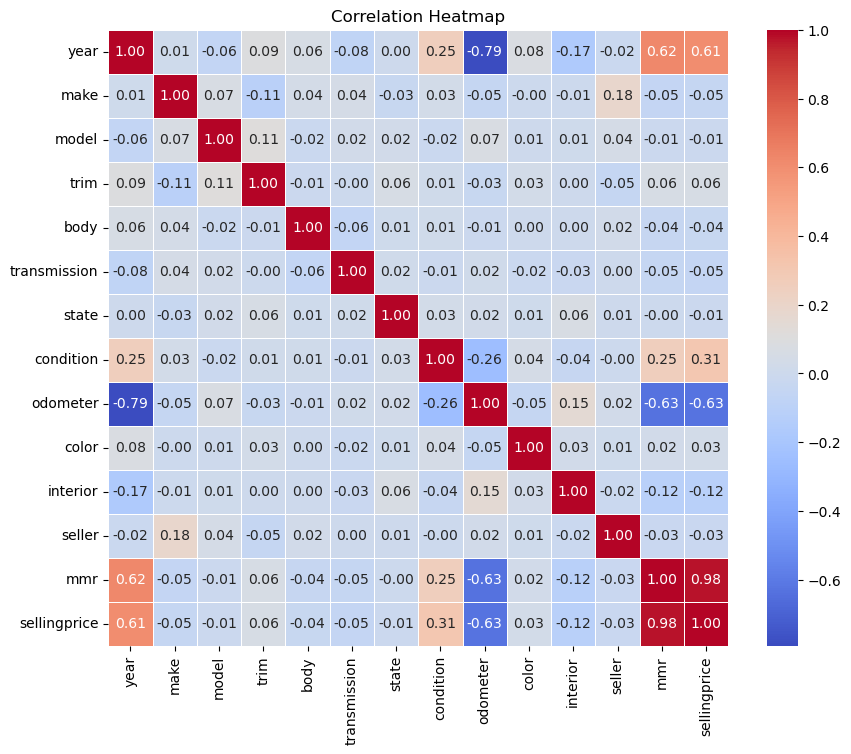

In [45]:
corr = car_data_for_pca.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the above correlation plot, it can be fairly assumed that features 'state' and 'model' have least impact on the Selling Price of the car. Hence, these columns can be removed for reducing the size of the dataset.

In [46]:
columns_to_drop = ['model', 'state']
car_data_for_training = car_data_for_pca.drop(columns = columns_to_drop)

In [47]:
car_data_for_training.head()

,year,make,trim,body,transmission,condition,odometer,color,interior,seller,mmr
0,2015,18,683,32,0,5.0,0.087370,17,1,5545,0.598524
1,2015,18,683,32,0,5.0,0.049320,17,0,5545,0.607380
2,2014,2,223,33,0,45.0,0.006984,7,1,3816,0.935055
3,2015,41,1025,33,0,41.0,0.074993,17,1,10724,0.805166
5,2015,28,89,33,0,1.0,0.029160,7,1,3533,0.446494


# 5. Comparing different models (Features are fixed)

## 5.1 Regression

### 5.1.1 Linear Regression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(car_data_for_training, regression_label_data, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print(mse, mae, r2)

2277312.206291292 1008.2184703695996 0.9562221652968277


### 5.1.2 Polynomial Regression 

In [52]:
degree = 3


poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)

In [53]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(mse, mae, r2)

2146297.1113748066 964.6707885402644 0.9587407295731835


### 5.1.3 Decision Tree Regression

In [55]:
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
print(mse, mae, r2)

2010366.6942140998 960.6426008510945 0.9613537833815964


### 5.1.4 Random Forest Regression

In [58]:
model = RandomForestRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
print(mse, mae, r2)

3401866.5941224615 1343.704961941113 0.9346043317959154


### 5.1.5 Xgboost Regression

In [61]:
model = XGBRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print(mse, mae, r2)

1799459.8847871984 902.2820591665665 0.9654081433482963


## Comparison of different models for regression yields Xgboost Regressor as the best performing model

## 5.2 Classification

In [64]:
X_train, X_test, y_train, y_test = train_test_split(car_data_for_training, classification_label_data, test_size=0.2, random_state=42)

### 5.2.1 Logistic Regression

In [125]:
model = LogisticRegression(class_weight='balanced', tol = 0.01, max_iter = 10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\LALIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

0.52719880411354
0.4945054945054945
0.48398251952348664


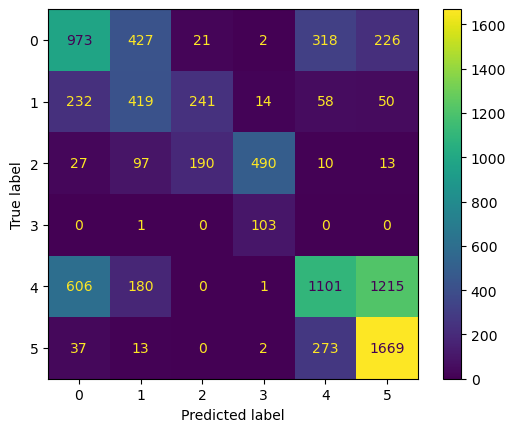

In [127]:
print(precision)
print(recall)
print(f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

### 5.2.2 MLP Classifier

In [96]:
model = MLPClassifier(hidden_layer_sizes=(400, 400), max_iter=1000, activation = 'tanh', solver = 'sgd', random_state=42)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\LALIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.08246843468625059
0.28717317891169886
0.1281388332780169


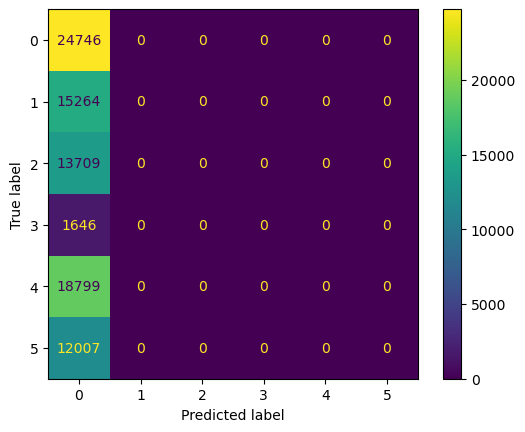

In [98]:
print(precision)
print(recall)
print(f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

### 5.2.3 Decision Tree Classifier

In [105]:
model = DecisionTreeClassifier(max_depth=8) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

0.8421449852732642
0.8419421847257198
0.8419618050692456


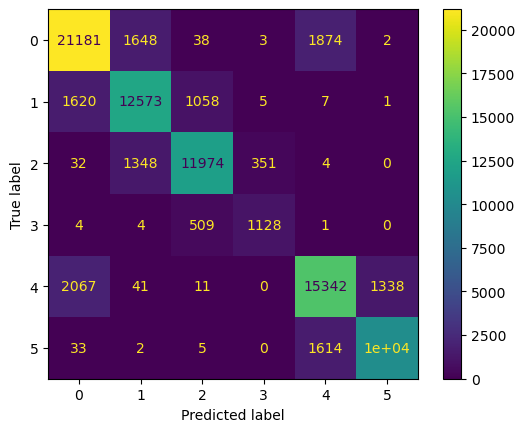

In [107]:
print(precision)
print(recall)
print(f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

### 5.2.4 Random Forest Classifier

In [108]:
model = RandomForestClassifier(n_estimators=100, max_depth=3) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\LALIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.774703848424446
0.7885715611980829
0.7798216178289586


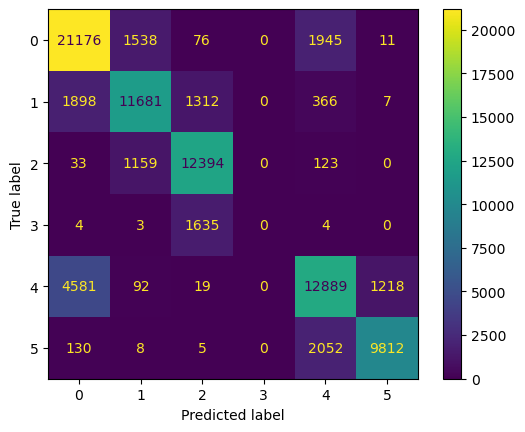

In [110]:
print(precision)
print(recall)
print(f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

### 5.2.5 Xgboost Classifier

In [111]:
model = XGBClassifier(n_estimators=100, max_depth=3)  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

0.8483590706922767
0.8485221246126887
0.8483955670431164


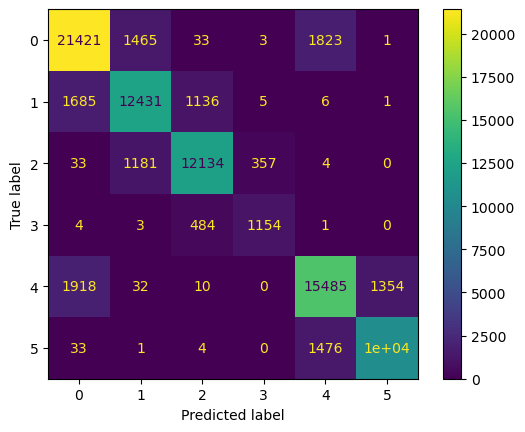

In [113]:
print(precision)
print(recall)
print(f1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

## Comparison of different models for classification yeilds Xgboost classifier as the best performing model

# 6. Unsupervised + Supervised

In [241]:
car_data_for_training['sellingprice'] = regression_label_data
car_data_for_training['priceBins'] = classification_label_data

In [242]:
X = car_data_for_training.drop(columns=['sellingprice', 'priceBins']) 
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
car_data_for_training['cluster'] = kmeans.fit_predict(X)

## 6.1 Clustering + Regression

In [243]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=100, max_depth=3)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


The 'Clustering + Regression' generates almost similar results compared to 'Regression' alone with the best performing Xgboost model. Hence, tried changing the Xgboost's parameters, but all the combinations of the paramters tend to give close results. The results of different paramterts have been documented below. 

### Try 2 for 'Clustering + Regression'

In [244]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=100, max_depth=6)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


### Try 3 for 'Clustering + Regression'

In [245]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=130, max_depth=6)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


### Try 4 for 'Clustering + Regression'

In [246]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=150, max_depth=9)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


### Try 5 for 'Clustering + Regression'

In [247]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=80, max_depth=6)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


### Try 6 for 'Clustering + Regression'

In [248]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=80, max_depth=3)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


### Try 7 for 'Clustering + Regression'

In [249]:
regression_models_r2 = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['sellingprice']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    regression_model = XGBRegressor(n_estimators=300, max_depth=12)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    regression_models_r2[cluster_no] = r2_score(y_test, y_pred)
total_r2_regression = 0.0
for i in range(len(regression_models_r2)):
    total_r2_regression += regression_models_r2[i]
average_r2_regression = total_precision_regression/float(len(regression_models_r2))
print('Average R2 Score for regression is: ', average_r2_regression)

Average R2 Score for regression is:  0.9656951859231458


## 6.2 Clustering + Classification

In [230]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=100, max_depth=3) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')

In [231]:
total_precision_classification = 0.0
for i in range(len(classification_models_r2)):
    total_precision_classification += classification_models_r2[i]
average_precision_classification = total_precision_classification/float(len(classification_models_r2))
print('Average precision for classification is: ', average_precision_classification)

0.8463260740755073

The 'Clustering + Classification' generates almost similar results compared to 'Classification' alone with the best performing Xgboost model. Hence, tried changing the Xgboost's parameters, but all the combinations of the paramters tend to give close results. The results of different paramterts have been documented below. 

### Try 2 for 'Clustering + Classification'

In [233]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=100, max_depth=6) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


### Try 3 for 'Clustering + Classification'

In [234]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=130, max_depth=6) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


### Try 4 for 'Clustering + Classification'

In [236]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=150, max_depth=9) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


### Try 5 for 'Clustering + Classification'

In [237]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=80, max_depth=6) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


### Try 6 for 'Clustering + Classification'

In [238]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=80, max_depth=3) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


### Try 7 for 'Clustering + Classification'

In [239]:
classification_models_precision = {}
for cluster_no in range(n_clusters):
    cluster_data = car_data_for_training[car_data_for_training['cluster'] == cluster_no]
    X_cluster = cluster_data.drop(columns=['sellingprice', 'priceBins', 'cluster'])
    y_cluster = cluster_data['priceBins']
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    classification_model = XGBClassifier(n_estimators=300, max_depth=12) 
    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    classification_models_precision[cluster_no] = precision_score(y_test, y_pred, average = 'weighted')
total_precision_classification = 0.0
for i in range(len(classification_models_precision)):
    total_precision_classification += classification_models_precision[i]
average_precision_classification = total_precision_classification/float(len(classification_models_precision))
print('Average precision for classification is: ', average_precision_classification)

Average precision for classification is:  0.8463260740755073


# 7. Conclusion and result justification

For the selected dataset 'Car Price Prediction', regression and classification is performed. The label 'Selling Price' is a continuous variable. Hence, regression is performed directly using the 'Selling Price' label as it is. For regression, several models are implemented. Almost all the models performed good for the regression problem. But, Xgboost Regressor is the best performing model for the given problem of regression. 

As the label is continuous, to perform classification, the labels are converted into categories. The categories are made based on the price range. After converting the continuous label to discrete ranges, classification is performed using different models. In classification, 'Xgboost Classifier' produced best results. 

If regression and classification are compared, regression tend to perform better than classification. This can be attributed to the fact that the actual label is continuous and regression performs best on the continuous variables. Classification generated acceptable results, but since the original label was modified and then the task of classification was performed, it slightly underperformed as compared to the regression.

So, if I have to choose a model for predicting the car price, I will use 'Xgboost Regressor'. For this model I can use n_estimators in the range [90, 110], and max_depth in the range [4, 6]. 

Coming to the end, I really enjoyed this course. The course was online, so it enabled me to learn at my own pace, and revise the concepts whenever I wanted. This course helped me strengthen my foundations of machine learning, and I am confident that this strong foundation will enable me in building bigger and complex model to solve problems.